In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text
plt.style.use(r"rw_visualization.mplstyle")

In [24]:
data = {
    "MNIST": {
        "Wang et al. 2019": [[(-0.20, 15.7)],[(-0.54, 32.23)]],
        "Chen et al. 2019": [[(-0.71, 3.88)]], #chen2019data
        "ashok2017n2n": [[(0.01, 127.02)]],
    },
    "SVHN": {
        "Wang et al. 2019": [[(-0.97, 20.14)], [(-1.87, 45.25)]],
        "Su et al. 2022": [[(-0.21, 3.35)]],
        "Choi et al. 2020": [[(-1.56, 11.00)]],
        "Ashok et al. 2017": [[(0.18, 19.80)]],
        "Zhao et al. 2020": [[(-0.06, 3.29)]],
    },
    "CIFAR10": {
        "Wang et al. 2019": [[(-1.78, 6.00)],[(-4.21, 20.80)]],
        "Su et al. 2022": [[(-0.37, 3.26)]],
        "Chen et al. 2019*": [[(-3.36, 1.91)]],
        "Choi et al. 2020": [[(-0.50, 1.90)],[(-8.63, 11.00)]],
        "Ashok et al. 2017": [[(0.30, 10.28)],[(-0.33, 20.53)]],
        "Bhardwaj et al. 2019": [[(0.96, 19.35)],[(-1.17, 20.7)]],
        # "Blakeney et al. 2020": [[(-0.73, 0)]],
        "Gou et al. 2023": [[(0.14, 1.91)]],  
        # "gou2023hierarchical": [(-1.43, 0)], # Last one doesnt have a CF
        "Zhao et al. 2020": [[(-0.30, 3.19)],[(-0.93, 3.52)]],
    },
    "CIFAR100": {
        "Su et al. 2022": [[(-1.20, 3.26)]],
        "Chen et al. 2019*": [[(-1.01, 1.90)],[(-0.74, 2.06)]], # chen2019knowledge
        "Hossain et al. 2024": [[(1.01, 3.95)]],
        # "hossain2024purf": [(-3.03, 0)],  # No CF
        "Chen et al. 2019": [[(-3.37, 1.91)]],
        "Choi et al. 2020": [[(-1.33, 1.90)]],
        "Ashok et al. 2017": [[(-2.75, 5.02)],[(-4.21, 4.64)]],
        # "chen2022knowledge": [[(-0.13, 0)],[(0.12, 0)]],  # No CF
        "Gou et al 2022": [[(1.54, 1.8)],[(-7.11, 52.2)]],
        "Bhardwaj et al. 2019": [[(-3.54, 42.94)]],
        # "Blakeney et al. 2020": [[(-1.61, 0)]],
        "Gou et al. 2023": [[(0.86, 1.67)]],
        # "gou2023hierarchical": [(-2.79, 0)],  # No CF
        "Zhao et al. 2020": [[(-0.72, 3.19)]],
    },
    "ImageNet": {
        "Su et al. 2022": [[(-0.37, 2.35)]],
        "Chen et al. 2019*": [[(-6.49, 36.67)]],
        # "chen2022knowledge": [(-4.60, 0)],  # No CF
        "Gou et al 2022": [[(-2.19, 1.90)]],
        # "Blakeney et al. 2020": [[(-0.60, 0.00)]],
        "Gou et al. 2023": [[(-2.40, 1.90)]],
    },
    # "tiny_imagenet": {
    #     "Choi et al. 2020": [[(-2.61, 1.89)]],
    #     "Zhao et al. 2020": [[(-2.92, 3.29)]],
    # },
    # "others": {
    #     "Chen et al. 2019": [[(-1.56, 3.20)]],
    #     "Chen et al. 2018": [[(-1.00, 1.36)],[(-3.10, 1.36)]],
    #     "Ashok et al. 2017": [[(-2.94, 3.12)]],
    #     "Xie et al. 2021": [[(-0.10, 8.38)],[(-2.40, 15.53)],[(0, 8.38)],[(-3.3, 15.53)]],
    # },
}

In [25]:
delta_acc = []
cf = []
for ds, studies in data.items():
    for study, results in studies.items():
        for result in results:
            for tup in result:
                delta_acc.append(tup[0])
                cf.append(tup[1])

# Output the lists
print("Delta Accuracies:", delta_acc)
print("Compression Factors:", cf)

Delta Accuracies: [-0.2, -0.54, -0.71, 0.01, -0.97, -1.87, -0.21, -1.56, 0.18, -0.06, -1.78, -4.21, -0.37, -3.36, -0.5, -8.63, 0.3, -0.33, 0.96, -1.17, 0.14, -0.3, -0.93, -1.2, -1.01, -0.74, 1.01, -3.37, -1.33, -2.75, -4.21, 1.54, -7.11, -3.54, 0.86, -0.72, -0.37, -6.49, -2.19, -2.4]
Compression Factors: [15.7, 32.23, 3.88, 127.02, 20.14, 45.25, 3.35, 11.0, 19.8, 3.29, 6.0, 20.8, 3.26, 1.91, 1.9, 11.0, 10.28, 20.53, 19.35, 20.7, 1.91, 3.19, 3.52, 3.26, 1.9, 2.06, 3.95, 1.91, 1.9, 5.02, 4.64, 1.8, 52.2, 42.94, 1.67, 3.19, 2.35, 36.67, 1.9, 1.9]


In [26]:
delta_acc, cf = np.array(delta_acc), np.array(cf)
mean_acc, mean_cf_1 = delta_acc.mean(), cf.mean()
print(mean_cf_1, mean_acc)

14.38175 -1.50325


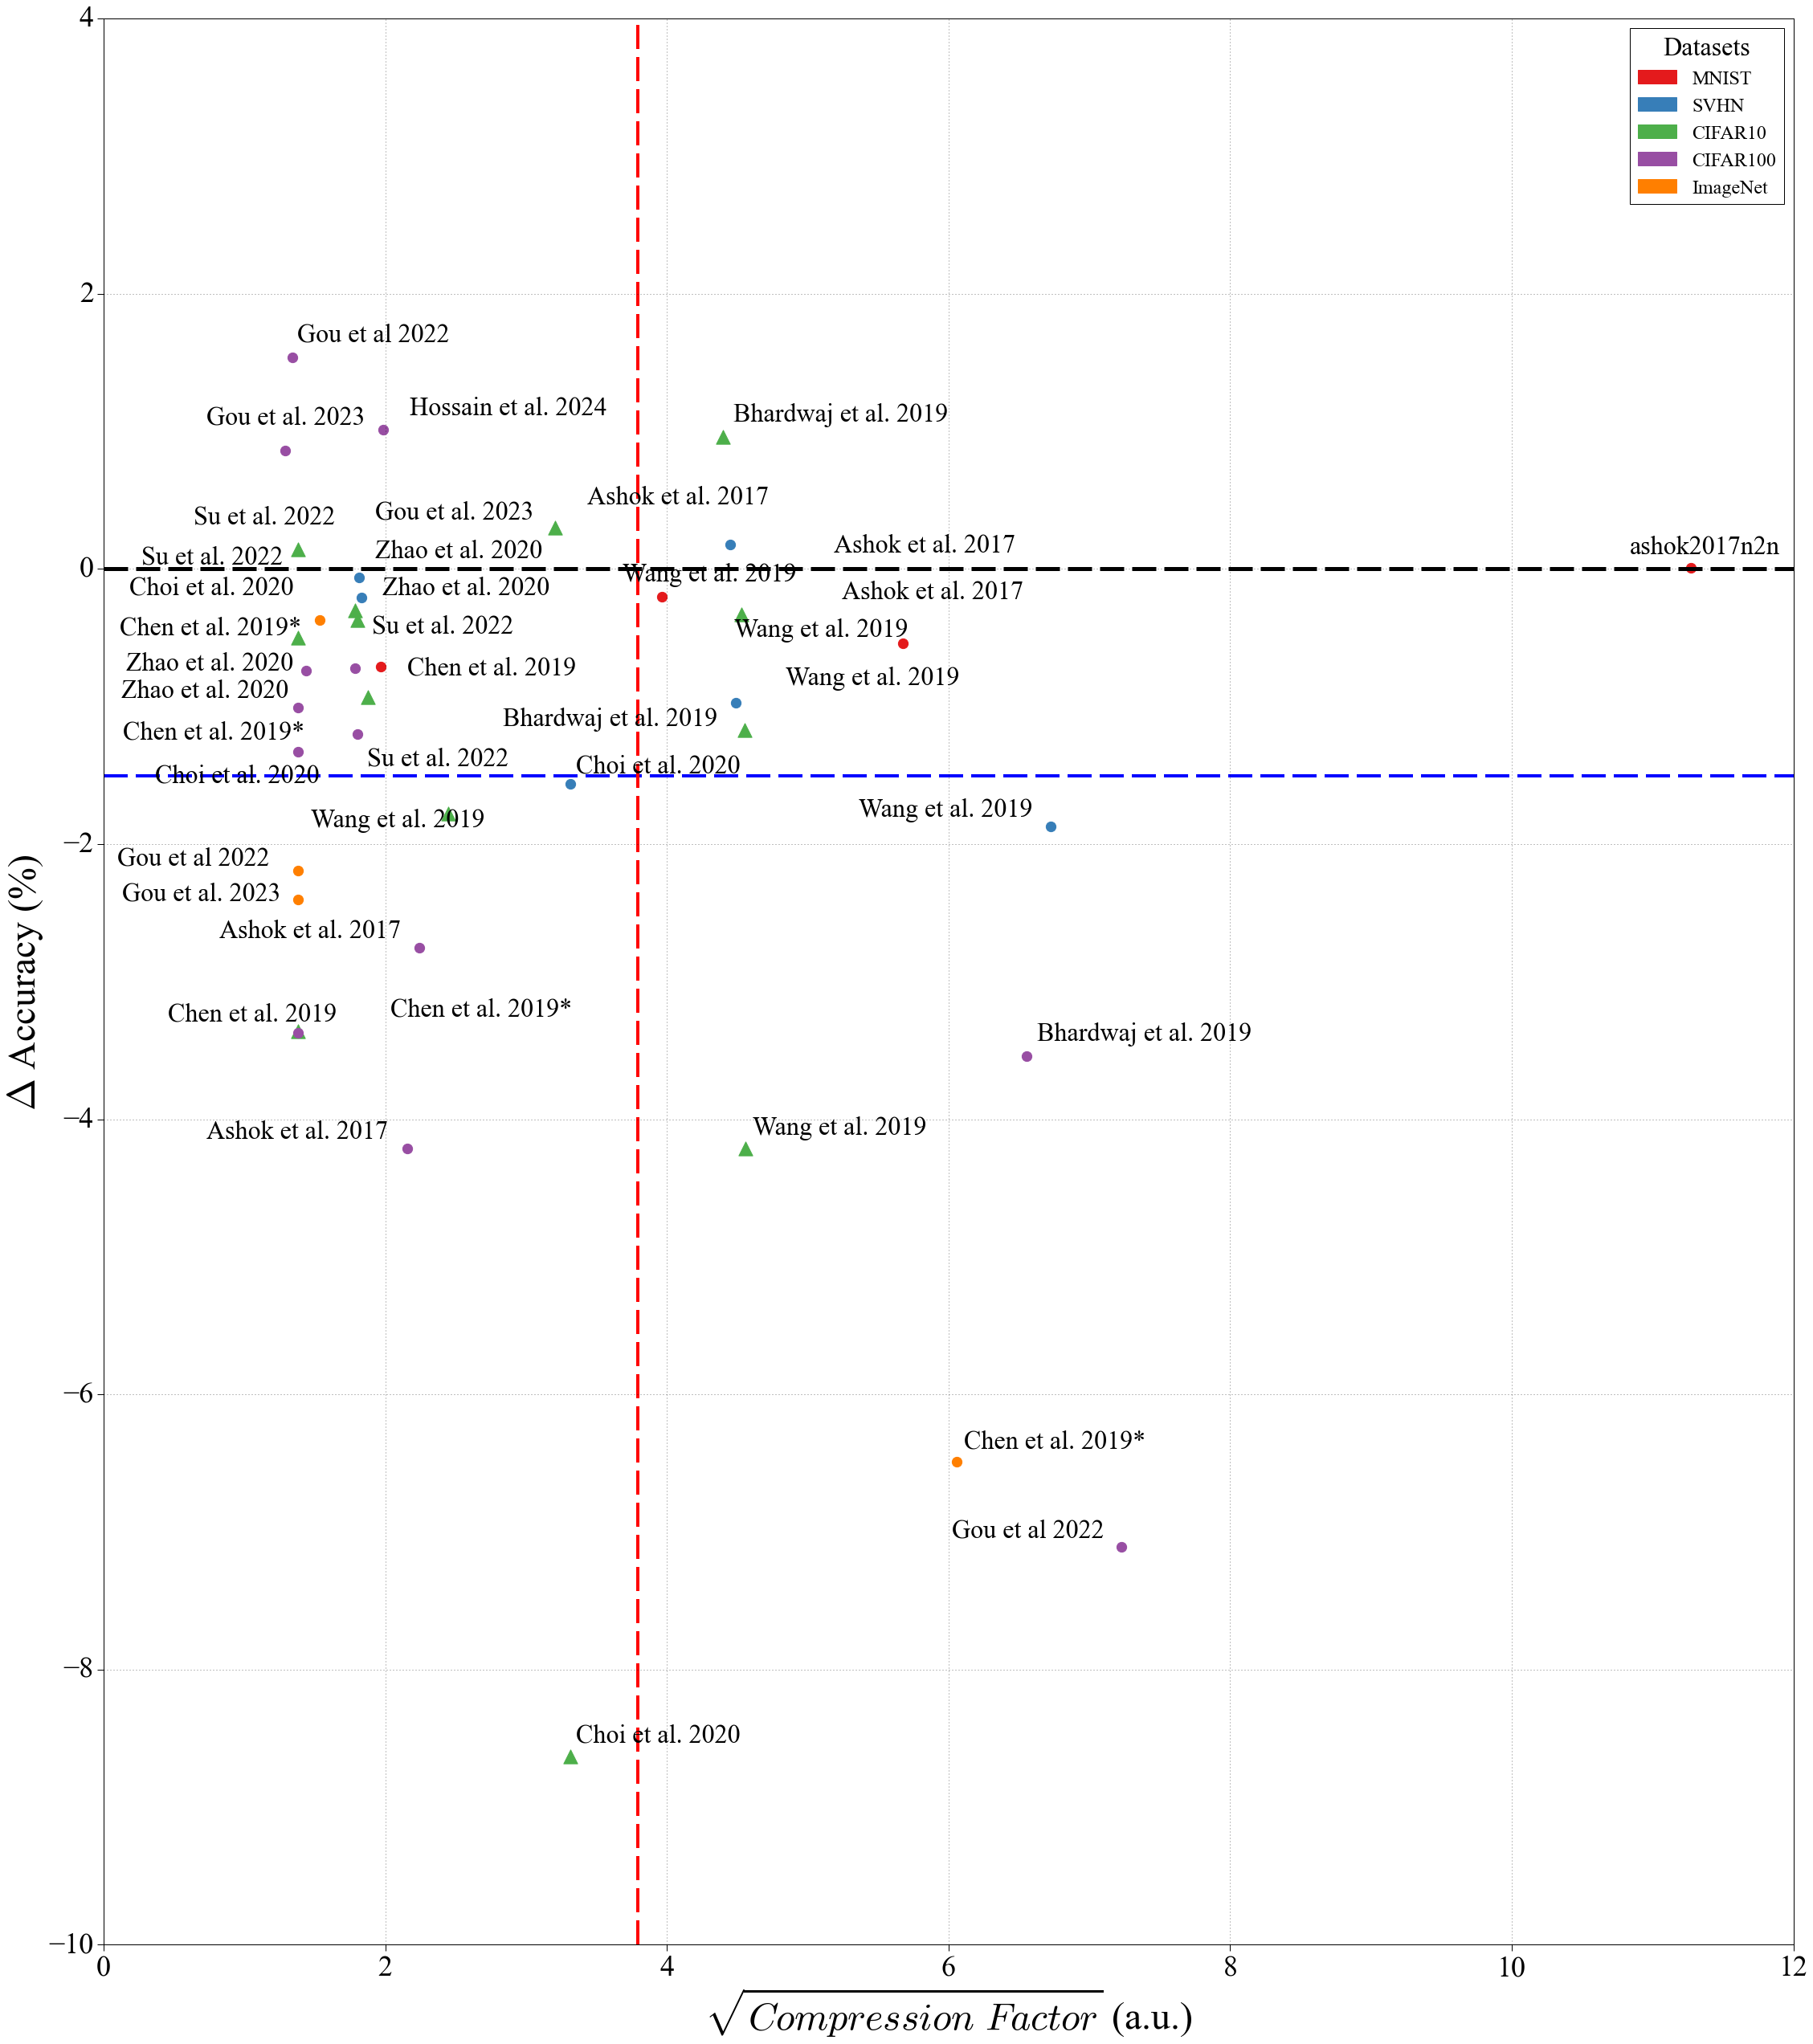

In [28]:
# Using a ColorBrewer qualitative palette with seaborn
colors = sns.color_palette("Set1", n_colors=len(data))
# colors[5] = 'black'
dataset_handles = []
texts = []
delta_accs = []
cfs = []
dash = (30, 10)
data_group_id = 0
plt.figure(figsize=(32,36))
scale = 0.5
mean_cf = mean_cf_1**scale
plt.axhline(y=0, color="black", linestyle="--",linewidth=5.0, dashes=dash)
plt.axhline(y=mean_acc, color="blue", linestyle="--", linewidth=4.0,dashes=dash)
plt.axvline(x=mean_cf, color="red", linestyle="--",linewidth=4.0, dashes=dash)
for dataset, data_dict in data.items():
    color = colors[data_group_id]  # Select color from the palette
    for key, points in data_dict.items():
        for tuple in points:
            delta_accuracy, cf = tuple[0]
            delta_accs.append(delta_accuracy)
            cf = cf**scale
            cfs.append(cf)
            if dataset == 'CIFAR10':
                plt.scatter(cf, delta_accuracy, marker='^', color=color, s=300) 
            else:
                plt.scatter(cf, delta_accuracy, marker='o', color=color, s=150)
            for i, (y, x) in enumerate(tuple):
                x = x**scale
                text = plt.text(x, y, f"{key}", fontsize=32, ha='right', va='bottom')
                texts.append(text)

    # Create a legend handle for the dataset
    dataset_handles.append(mpatches.Patch(color=color, label=dataset))
    data_group_id += 1

mean_acc = np.mean(delta_accs)
mean_cf = np.mean(cfs)
adjust_text(texts)
# dataset_handles.append(mpatches.Patch(edgecolor='blue', antialiased=True, facecolor='blue', label='Mean $\Delta$ Accuracy', linestyle='--'))
# dataset_handles.append(mpatches.Patch(color='red', label='Mean Compression Factor', ls='-'))
plt.ylabel("$\Delta$ Accuracy (%)", fontsize=48)
plt.xlabel("$\sqrt{Compression \ Factor}$ (a.u.)", fontsize=48)
# plt.title("Comparison of Different Methods Across Datasets", fontsize=32)
plt.grid(True)
legend = plt.legend(handles=dataset_handles, title="Datasets", loc='best', fontsize=24)
plt.setp(legend.get_title(),fontsize=32)
plt.tick_params(labelsize=36)
# plt.tight_layout()
plt.savefig("/Users/davidhernandez/Desktop/Nordling_Lab/nordlinglab-grants-publications/Article_Chang2024_integrated_gradients/sn_version_corrected/article/Figures/plot_studies.pdf")
plt.tight_layout()
plt.show()
